In [ ]:
import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Vizuelizacija

import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing

import statsmodels.api as sm
from scipy import stats

### Modeling

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg

### Tabelarno prikazivanje rezultata

from tabulate import tabulate

### Brisanje nepotrebnih upozorenja

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Car_sales.csv')


dataset.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


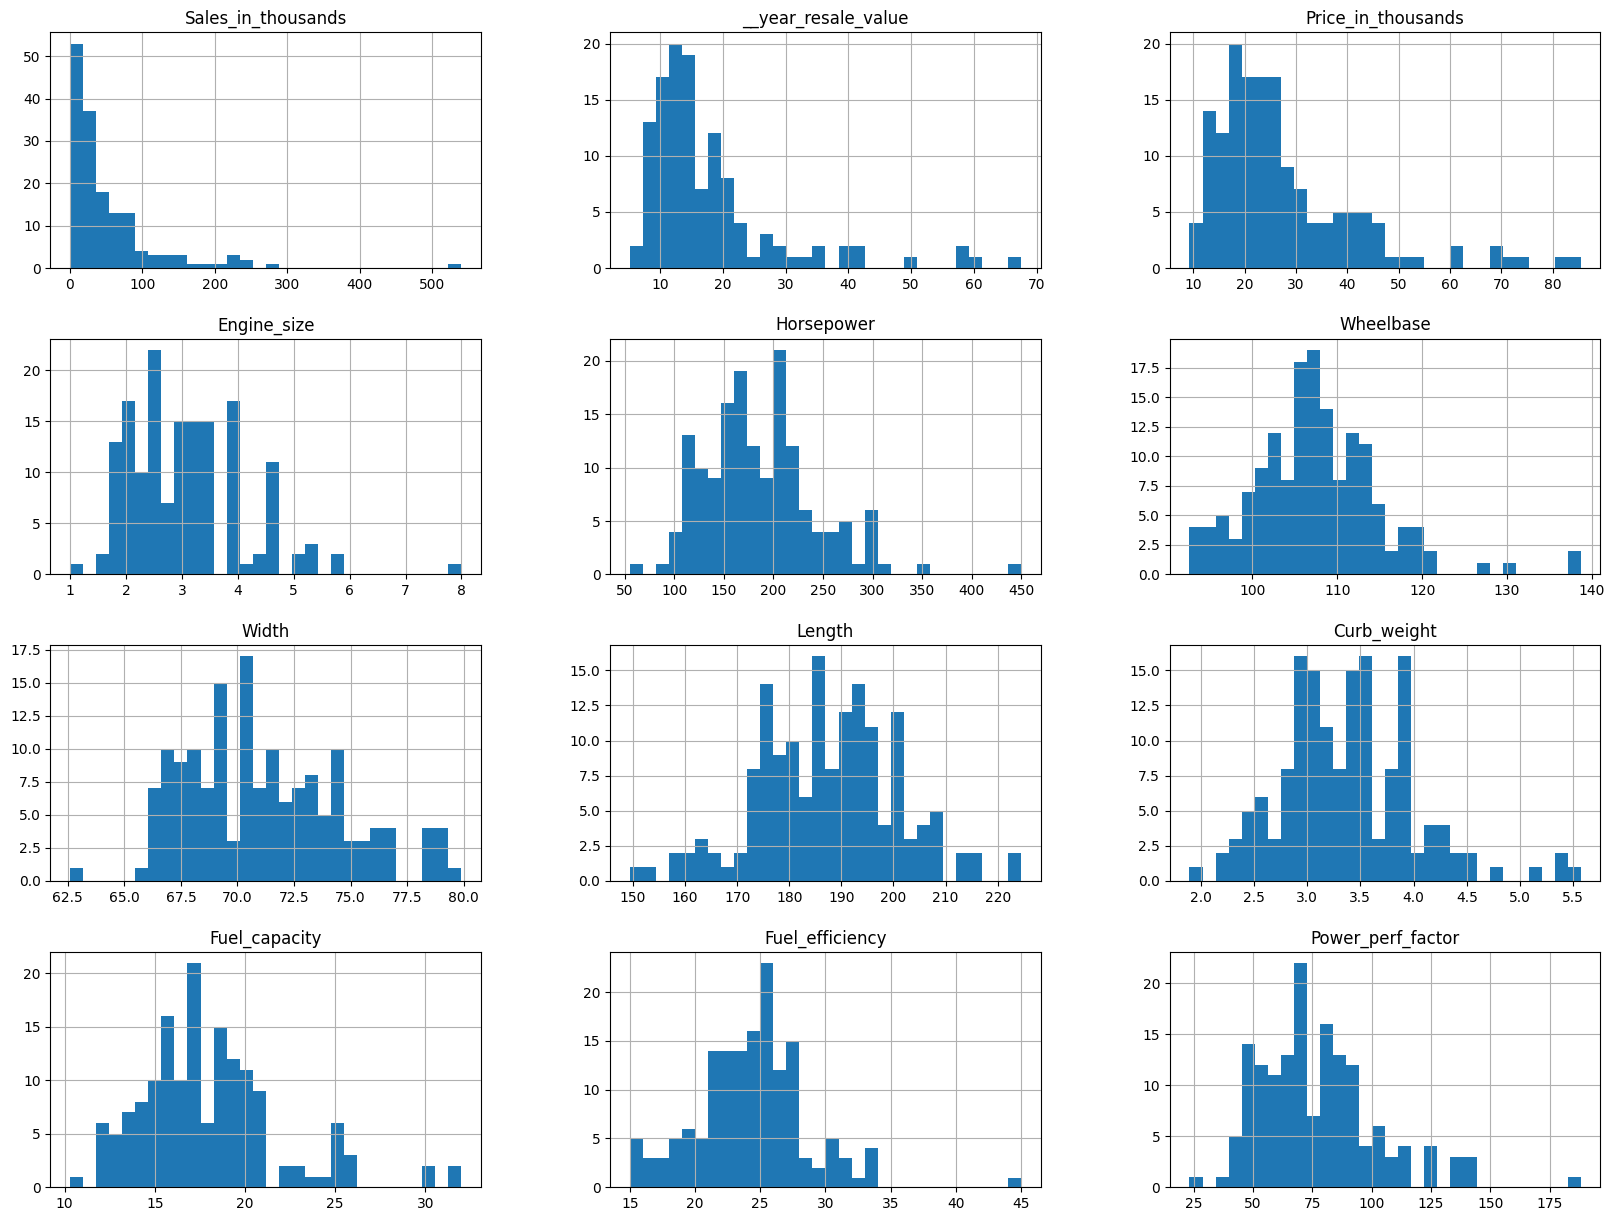

In [ ]:
dataset.hist(bins=30, figsize=(20, 15))
plt.show()

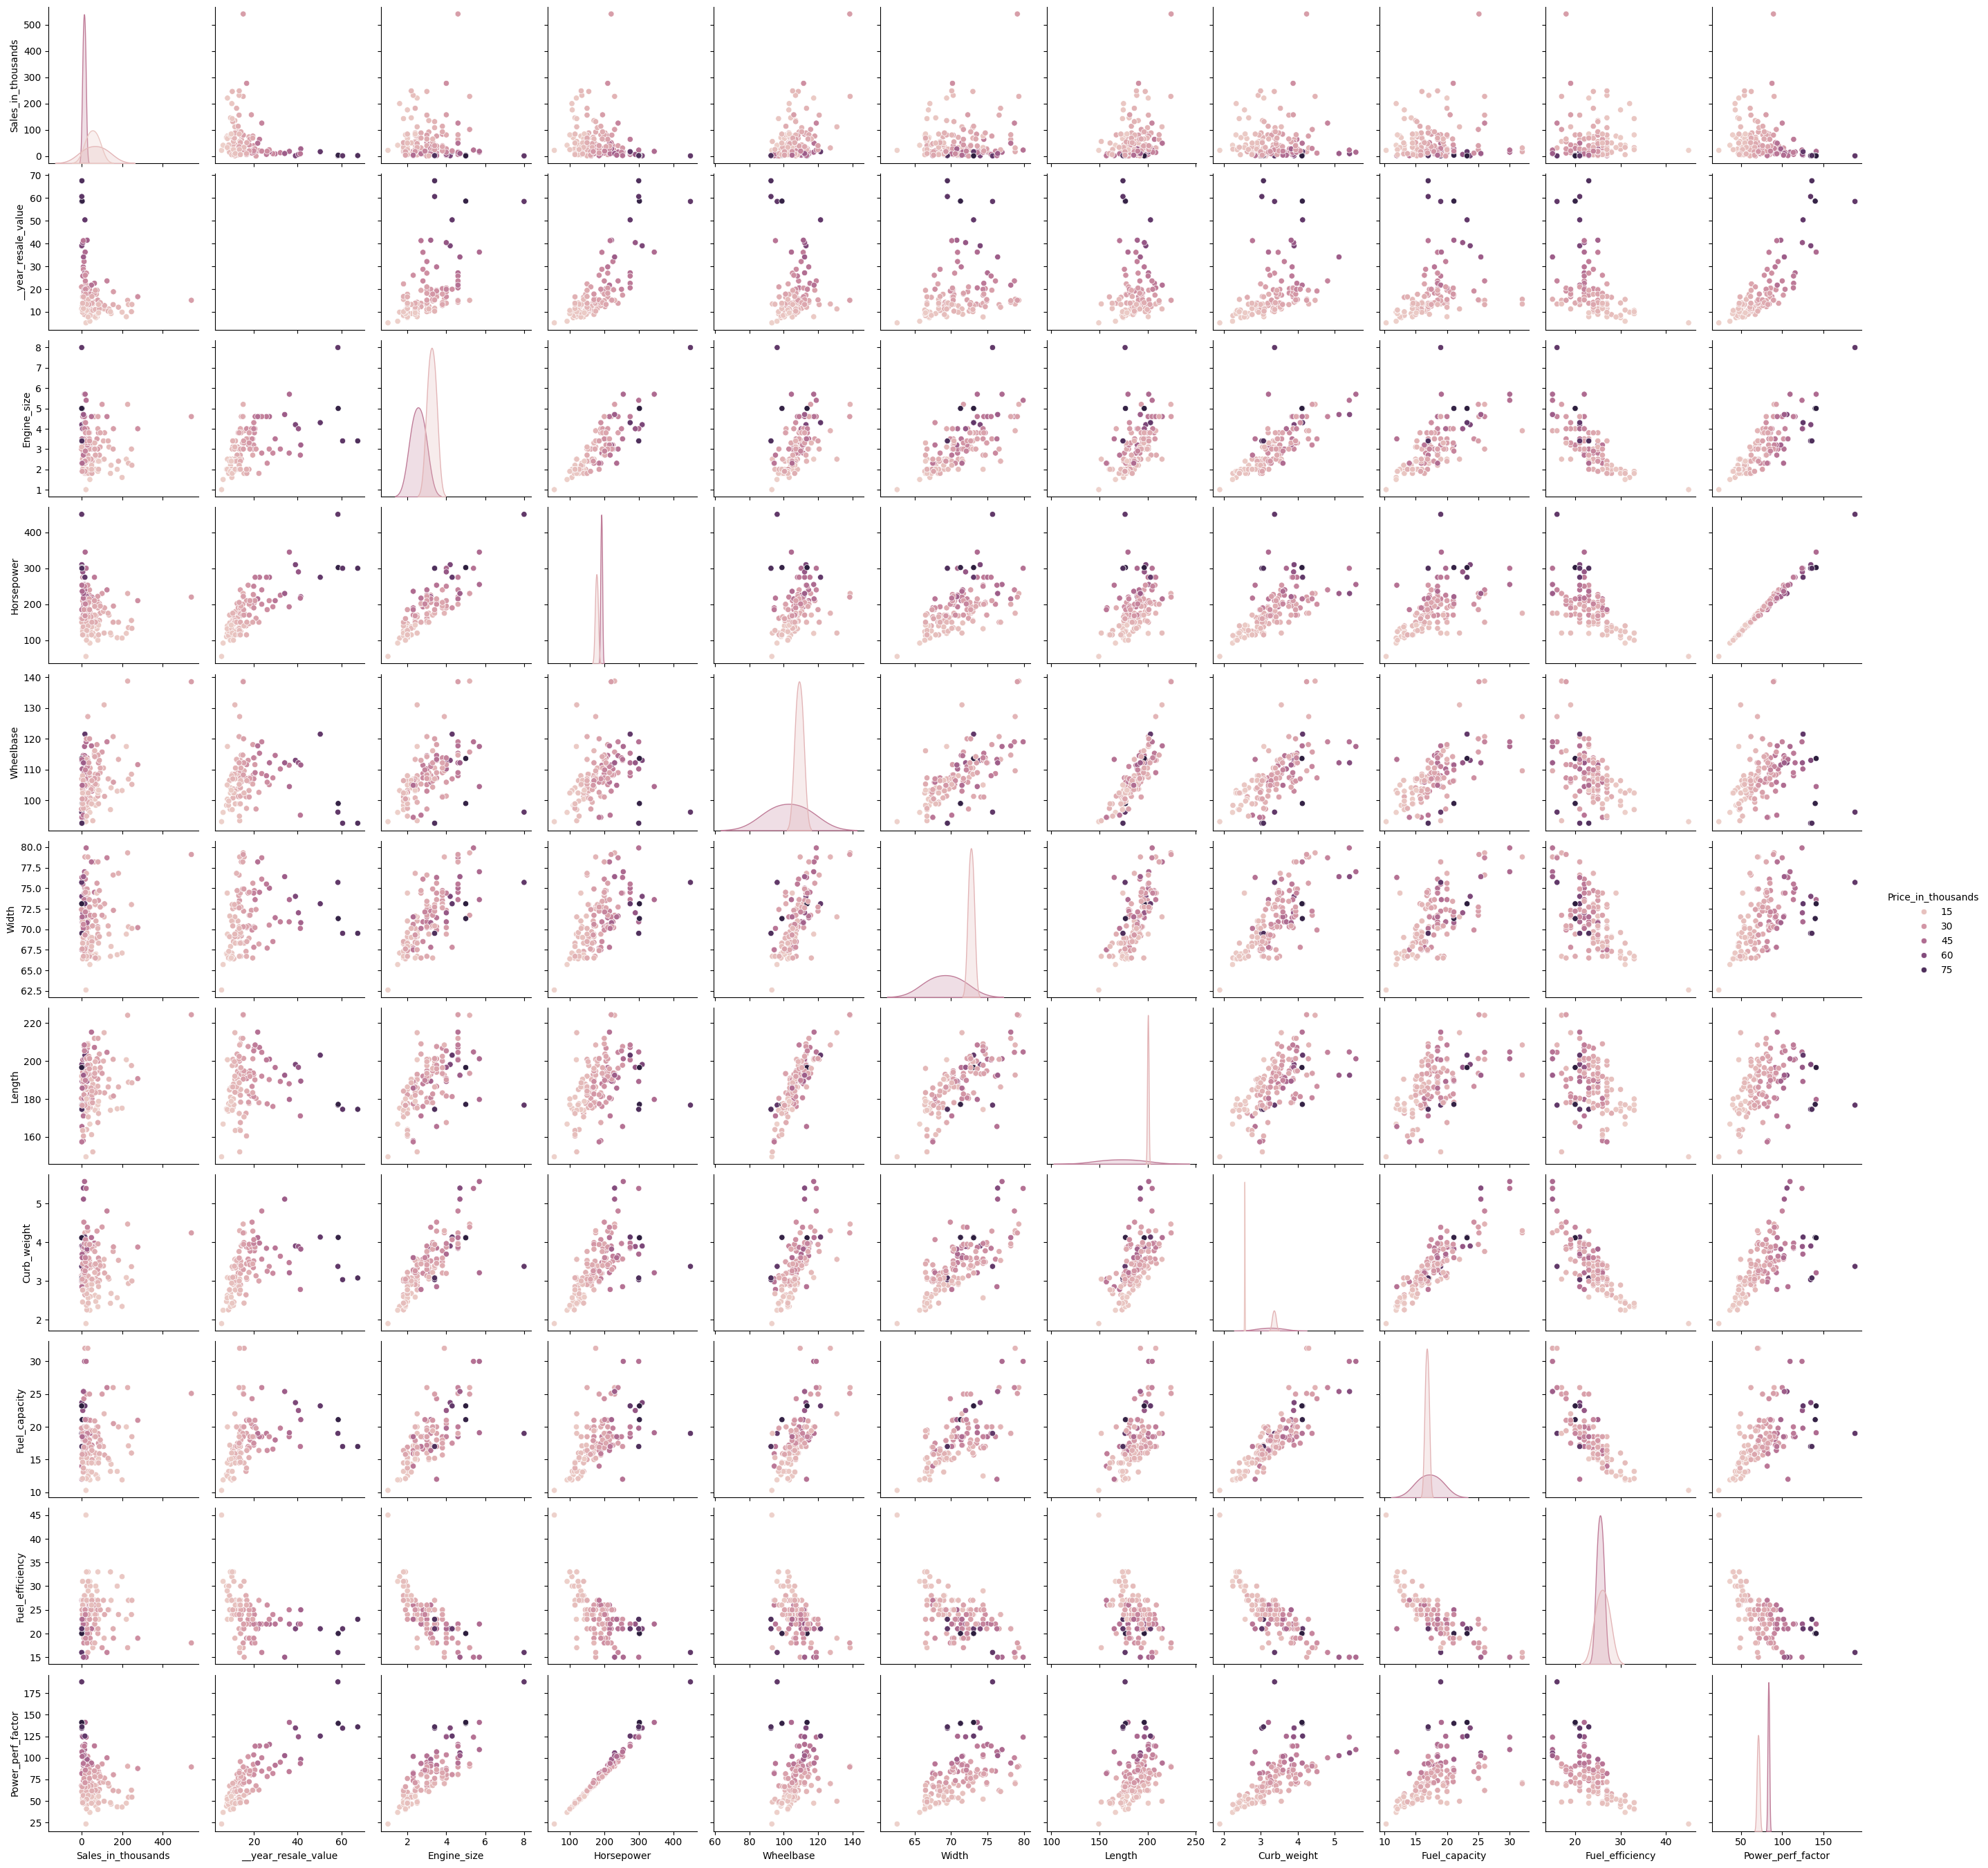

In [ ]:
#Vizuelizacija odnosa izmedju atributa
sns.pairplot(dataset, hue='Price_in_thousands')
plt.show()

In [ ]:
# Tipovi podataka u bazi

dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [ ]:
#Kategoricki podaci

dataset.Manufacturer = dataset.Manufacturer.astype('category')
dataset.Model = dataset.Model.astype('category')
dataset.Vehicle_type = dataset.Vehicle_type.astype('category')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Manufacturer         157 non-null    category
 1   Model                157 non-null    category
 2   Sales_in_thousands   157 non-null    float64 
 3   __year_resale_value  121 non-null    float64 
 4   Vehicle_type         157 non-null    category
 5   Price_in_thousands   155 non-null    float64 
 6   Engine_size          156 non-null    float64 
 7   Horsepower           156 non-null    float64 
 8   Wheelbase            156 non-null    float64 
 9   Width                156 non-null    float64 
 10  Length               156 non-null    float64 
 11  Curb_weight          155 non-null    float64 
 12  Fuel_capacity        156 non-null    float64 
 13  Fuel_efficiency      154 non-null    float64 
 14  Latest_Launch        157 non-null    object  
 15  Power_perf_factor    15

In [ ]:
#Statistika o podacima
dataset.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


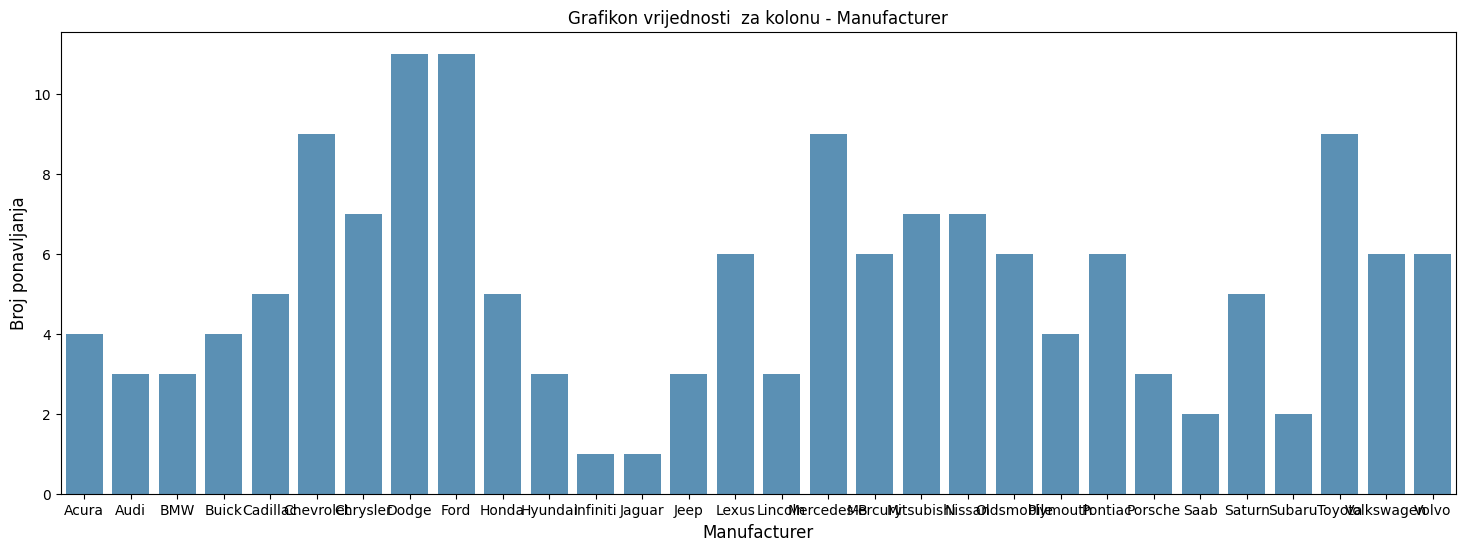

In [ ]:
#Podaci o koloni 'Manufacturer'
manufacturer_count = dataset['Manufacturer'].value_counts(dropna = False)
manufacturer_count

plt.figure(figsize = (18, 6))
sns.barplot(x=manufacturer_count.index, y=manufacturer_count.values, alpha = 0.8)
plt.title('Grafikon vrijednosti  za kolonu - Manufacturer')
plt.ylabel('Broj ponavljanja', fontsize = 12)
plt.xlabel('Manufacturer', fontsize = 12)
plt.show()

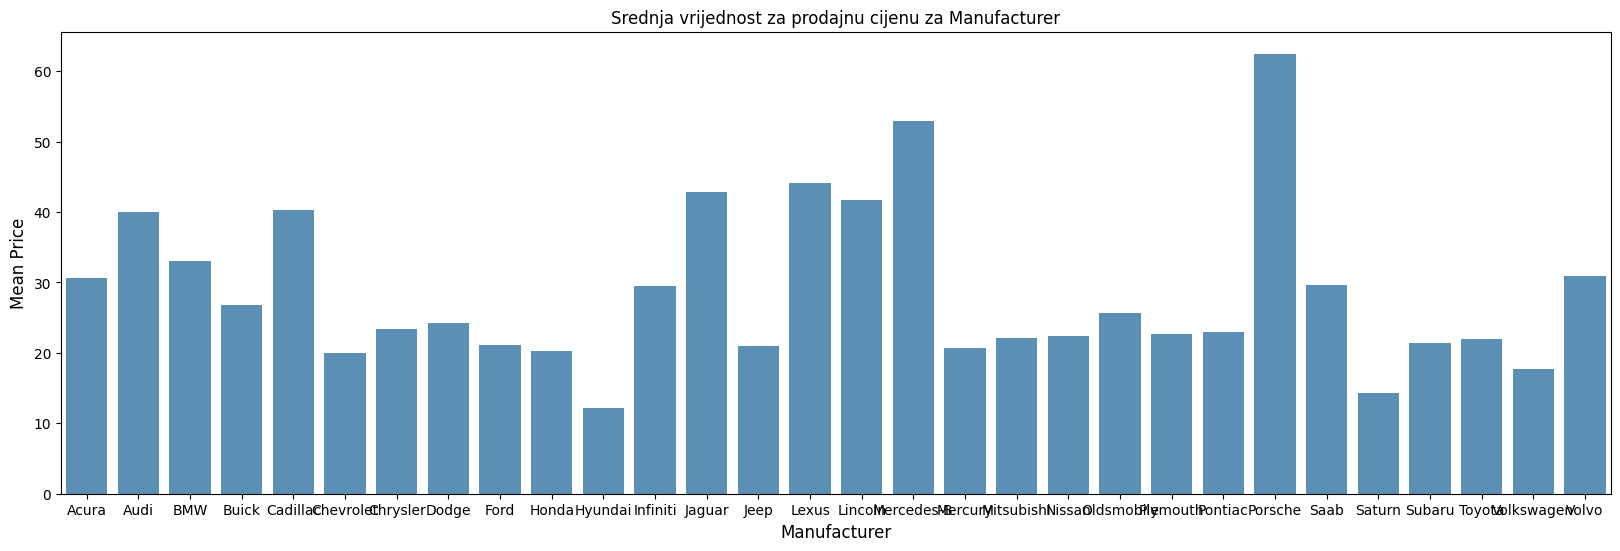

In [ ]:
#Prosjecna vrijednost za 'Manufacturer'
mean_price_manufacturer = dataset[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer', as_index = False).mean()
mean_price_manufacturer


plt.figure(figsize = (20, 6))
sns.barplot(x=mean_price_manufacturer['Manufacturer'], y=mean_price_manufacturer['Price_in_thousands'], alpha = 0.8)
plt.title('Srednja vrijednost za prodajnu cijenu za Manufacturer')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Manufacturer', fontsize = 12)
plt.show()

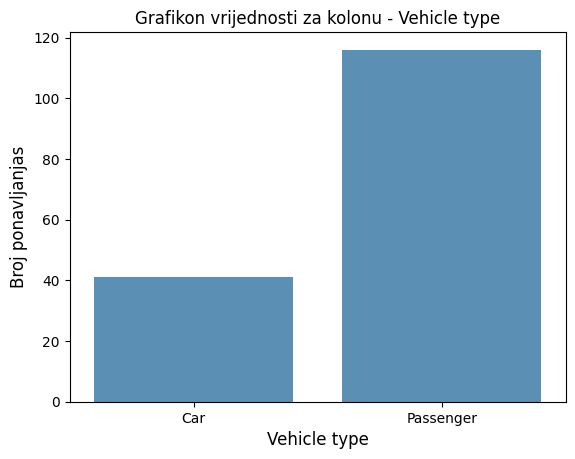

In [ ]:
#Podaci o koloni 'Vehicle_type'
vehicle_count = dataset['Vehicle_type'].value_counts(dropna = False)
vehicle_count

sns.barplot(x=vehicle_count.index, y=vehicle_count.values, alpha = 0.8)
plt.title('Grafikon vrijednosti za kolonu - Vehicle type')
plt.ylabel('Broj ponavljanjas', fontsize = 12)
plt.xlabel('Vehicle type', fontsize = 12)
plt.show()

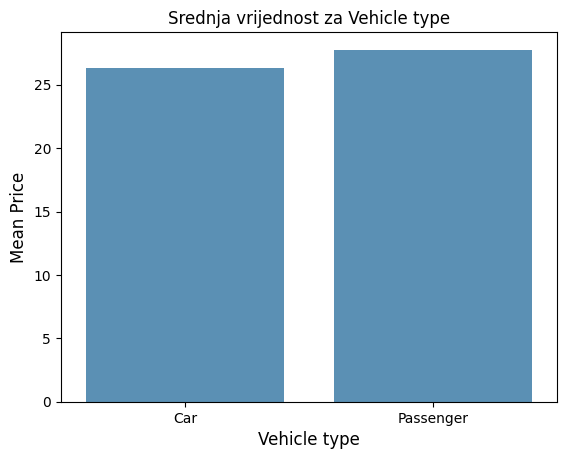

In [ ]:
#Projecna vrijednost za 'Vehicle_type'
mean_price_vehicle = dataset[['Vehicle_type', 'Price_in_thousands']].groupby('Vehicle_type', as_index = False).mean()
mean_price_vehicle

sns.barplot(x=mean_price_vehicle['Vehicle_type'], y=mean_price_vehicle['Price_in_thousands'], alpha = 0.8)
plt.title('Srednja vrijednost za Vehicle type')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Vehicle type', fontsize = 12)
plt.show()

Text(0.5, 1.0, 'Distribucija za kolonu - Fuel_capacity')

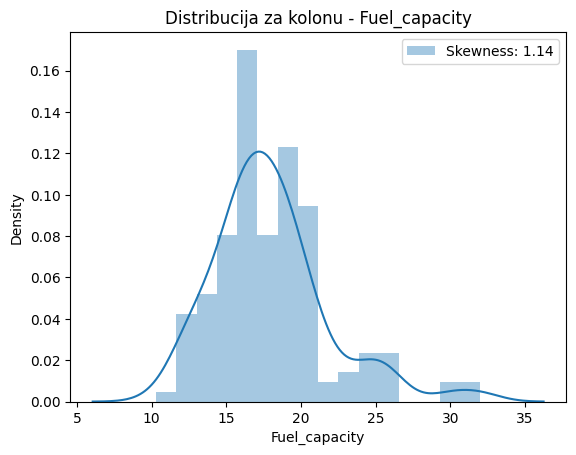

In [ ]:
#Vizuelizacija distribucije za 'Fuel_capacity', 'Curb_weight', 'Horsepower'
sns.distplot(dataset['Fuel_capacity'], label = 'Skewness: %.2f'%(dataset['Fuel_capacity'].skew()))
plt.legend(loc = 'best')
plt.title('Distribucija za kolonu - Fuel_capacity')

Text(0.5, 1.0, 'Distribucija za kolonu - Curb_weight')

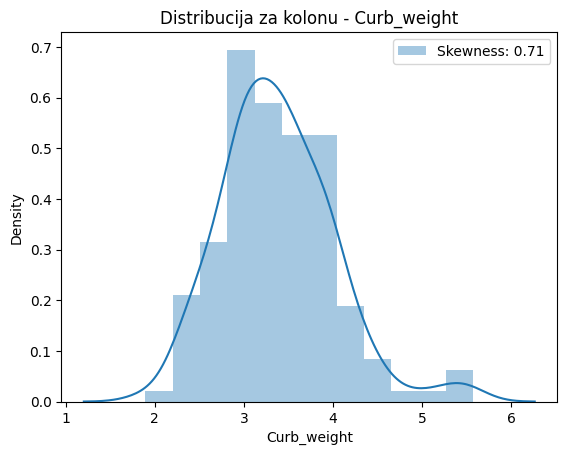

In [ ]:
sns.distplot(dataset['Curb_weight'], label = 'Skewness: %.2f'%(dataset['Curb_weight'].skew()))
plt.legend(loc = 'best')
plt.title('Distribucija za kolonu - Curb_weight')

Text(0.5, 1.0, 'Distribucija za kolonu - Horsepower')

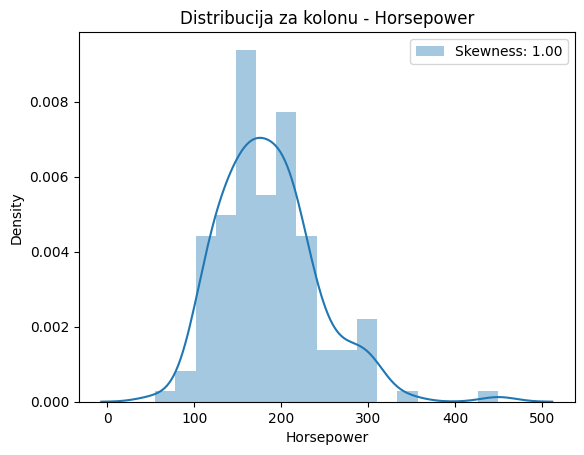

In [ ]:
sns.distplot(dataset['Horsepower'], label = 'Skewness: %.2f'%(dataset['Horsepower'].skew()))
plt.legend(loc = 'best')
plt.title('Distribucija za kolonu - Horsepower')

In [ ]:
#Preprocessing
def detect_outliers(df, n, features_list):
    outlier_indices = []
    for feature in features_list:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers_to_drop = detect_outliers(dataset, 2, ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
                                               'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
                                               'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'])
print("Izbacićemo: ".format(len(outliers_to_drop)), outliers_to_drop )

Izbacićemo:  []


In [ ]:
modified_dataset = dataset[dataset['Price_in_thousands'].notna()]
modified_dataset

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
#Nedostajuce vrijednosti
modified_dataset.isnull().sum().sort_values(ascending = False)

,0
__year_resale_value,36
Fuel_efficiency,2
Curb_weight,1
Manufacturer,0
Model,0
Sales_in_thousands,0
Vehicle_type,0
Price_in_thousands,0
Engine_size,0
Horsepower,0


In [ ]:
#Zamjena nedostajuacih podataka medijanom:
year_index = list(~modified_dataset['__year_resale_value'].isnull())
median_year = np.median(modified_dataset['__year_resale_value'].loc[year_index])
median_year
modified_dataset['__year_resale_value'].fillna(median_year, inplace = True)

fuel_index = list(~modified_dataset['Fuel_efficiency'].isnull())
median_fuel = np.median(modified_dataset['Fuel_efficiency'].loc[fuel_index])
median_fuel
modified_dataset['Fuel_efficiency'].fillna(median_year, inplace = True)

curb_index = list(~modified_dataset['Curb_weight'].isnull())
median_curb = np.median(modified_dataset['Curb_weight'].loc[curb_index])
median_curb
modified_dataset['Curb_weight'].fillna(median_curb, inplace = True)

In [ ]:
#Odbacivanje nevaznih podataka
modified_dataset.drop(['Model'], axis = 1, inplace = True)
modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,14.010,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,15.245,14.010,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,17.531,14.010,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,3.493,14.010,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
#Obrada karakteristika u bazi
class_1 = []
class_2 = []

for index in range(len(mean_price_manufacturer)):
    if mean_price_manufacturer.iloc[index, 1] <= 30:
        class_1.append(mean_price_manufacturer.iloc[index, 0])
    else:
        class_2.append(mean_price_manufacturer.iloc[index, 0])

print('Prva klasa ( $ < 30 000) ', class_1)
print('Druga klasa ($ > 30 000) ', class_2)

manufacturer_data = modified_dataset['Manufacturer']
new_manufacturer_data = []

for value in manufacturer_data:
    if value in class_1:
        new_manufacturer_data.append(1)
    else:
        new_manufacturer_data.append(2)

modified_dataset['Manufacturer'] = new_manufacturer_data

Prva klasa ( $ < 30 000)  ['Buick', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen']
Druga klasa ($ > 30 000)  ['Acura', 'Audi', 'BMW', 'Cadillac', 'Jaguar', 'Lexus', 'Lincoln', 'Mercedes-B', 'Porsche', 'Volvo']


In [ ]:
modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,2,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,2,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,2,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,2,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,2,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,3.545,14.010,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,2,15.245,14.010,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,2,17.531,14.010,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,2,3.493,14.010,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


Text(0.5, 1.0, 'Distribucija za kolonu - Age')

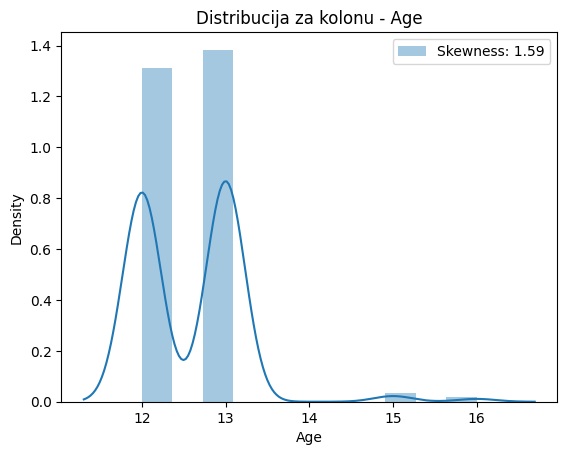

In [ ]:
#Na osnovu Latest_launch, formira se kolona age
age_data = []
launch_data = modified_dataset['Latest_Launch']

for value in launch_data:
    year = int(value.split('/')[-1])
    age_data.append(2024 - year)

modified_dataset['Age'] = age_data
modified_dataset
sns.distplot(modified_dataset['Age'], label = 'Skewness: %.2f'%(modified_dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Distribucija za kolonu - Age')

In [ ]:
#Uklanjanje kolone Latest_launch
modified_dataset.drop(['Latest_Launch'], axis = 1, inplace = True)

In [ ]:
#Konvertovanje u binarno
encoded_dataset = pd.get_dummies(data = modified_dataset, columns = ['Manufacturer', 'Vehicle_type'])
encoded_dataset

target_data = encoded_dataset['Price_in_thousands']
encoded_dataset['Target'] = target_data

encoded_dataset


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Manufacturer_2,Vehicle_type_Car,Vehicle_type_Passenger,Target
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,12,False,True,False,True,21.50
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,13,False,True,False,True,28.40
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,13,False,True,False,True,42.00
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,13,False,True,False,True,23.99
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,13,False,True,False,True,33.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,14.010,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,13,False,True,False,True,24.40
153,15.245,14.010,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,12,False,True,False,True,27.50
154,17.531,14.010,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,13,False,True,False,True,28.80
155,3.493,14.010,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,13,False,True,False,True,45.50


Text(0.5, 1.0, 'Matrica korelacije')

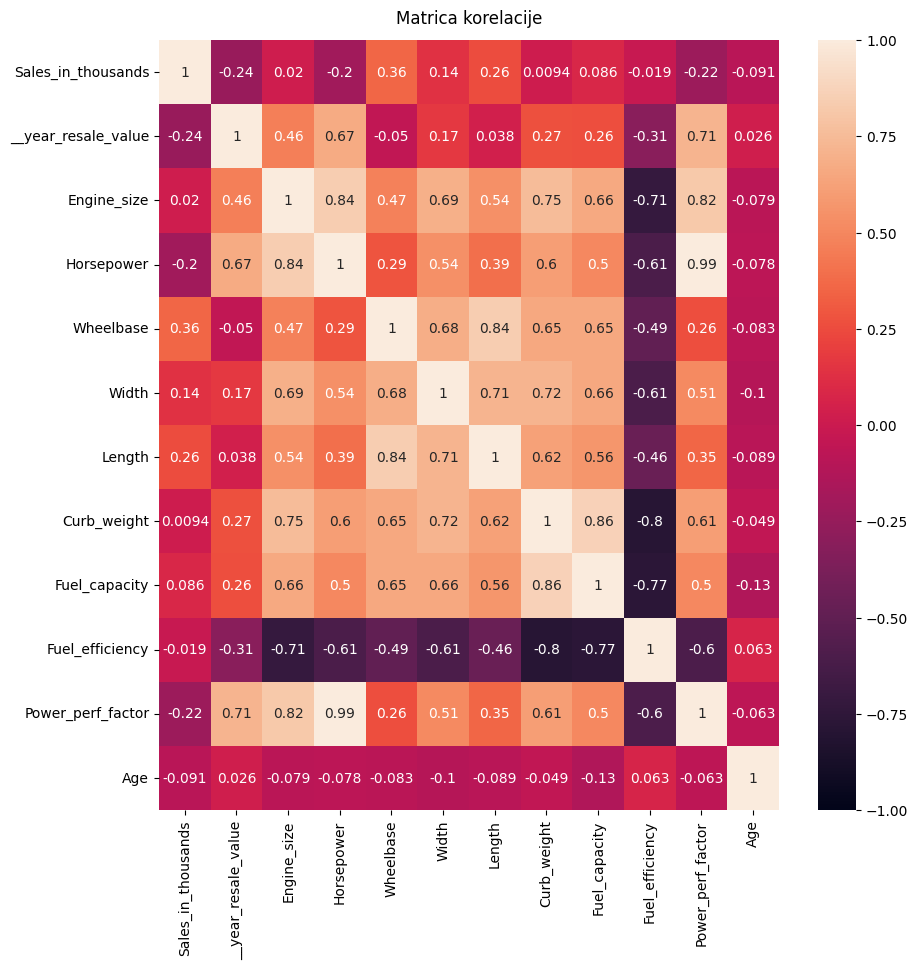

In [ ]:
#Matrica koleracije
filter_dataset = encoded_dataset[['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase',
                                  'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
                                  'Age']]
filter_dataset

plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(filter_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Matrica korelacije', fontdict = {'fontsize' : 12}, pad = 12)

In [ ]:
#Modeling
#Podjela dataset-a
X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)


In [ ]:
model_rmse = OrderedDict()
model_r2 = OrderedDict()

In [ ]:
#Mulitlinear regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

Y_pred = linear_regressor.predict(X_test)

In [ ]:
mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error modela je : {}'.format(rmse))
print('R-squared crijednost modela je : {}'.format(r2_value))

Root Mean Squared Error modela je : 0.0
R-squared crijednost modela je : 1.0


In [ ]:
#Decision Tree regression
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

Y_pred = decision_tree_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Decision Tree Regression'] = rmse
model_r2['Decision Tree Regression'] = r2_value
print('Root Mean Squared Error modela je : {}'.format(rmse))
print('R-squared vrijednost modela je: {}'.format(r2_value))

Root Mean Squared Error modela je : 0.989
R-squared vrijednost modela je: 0.996


In [ ]:
#Random forest regressor (25)
random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

Y_pred = random_forest_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (10 trees)'] = rmse
model_r2['Random Forest Regression (10 trees)'] = r2_value

print('Root Mean Squared Error modela je : {}'.format(rmse))
print('R-squaredvrijednost modela je : {}'.format(r2_value))

Root Mean Squared Error modela je : 2.464
R-squaredvrijednost modela je : 0.975


In [ ]:
#Random forest regressor (100)
random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)


Y_pred = random_forest_regressor.predict(X_test)

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (100 trees)'] = rmse
model_r2['Random Forest Regression (100 trees)'] = r2_value

print('Root Mean Squared Error modela je : {}'.format(rmse))
print('R-squared vrijednost tmodela je : {}'.format(r2_value))

Root Mean Squared Error modela je : 2.427
R-squared vrijednost tmodela je : 0.976


In [ ]:
#Evaluacija
model_rmse

model_r2

table = []
table.append(['S.No.', 'Classification Model', 'Root Mean Squared Error', 'R-squared'])
count = 1

for model in model_rmse:
    row = [count, model, model_rmse[model], model_r2[model]]
    table.append(row)
    count += 1

print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤══════════════════════════════════════╤═══════════════════════════╤═════════════╕
│   S.No. │ Classification Model                 │   Root Mean Squared Error │   R-squared │
╞═════════╪══════════════════════════════════════╪═══════════════════════════╪═════════════╡
│       1 │ Multi Linear Regression              │                     0     │       1     │
├─────────┼──────────────────────────────────────┼───────────────────────────┼─────────────┤
│       2 │ Decision Tree Regression             │                     0.989 │       0.996 │
├─────────┼──────────────────────────────────────┼───────────────────────────┼─────────────┤
│       3 │ Random Forest Regression (10 trees)  │                     2.464 │       0.975 │
├─────────┼──────────────────────────────────────┼───────────────────────────┼─────────────┤
│       4 │ Random Forest Regression (100 trees) │                     2.427 │       0.976 │
╘═════════╧══════════════════════════════════════╧════════════════════

In [ ]:
# Konvertovanje cijene u binarnu klasifikaciju
from sklearn.preprocessing import StandardScaler
encoded_dataset['Price_Class'] = (encoded_dataset['Sales_in_thousands'] > 30).astype(int)
encoded_dataset.drop(['Sales_in_thousands'], axis=1, inplace=True)

#Podjela modela
X_class = encoded_dataset.drop(['Price_Class'], axis=1).values
Y_class = encoded_dataset['Price_Class'].values
X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(X_class, Y_class, test_size=0.2, random_state=27)


scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


In [ ]:
# Inicijalizacija modela
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
tree_clf = DecisionTreeClassifier()
forest_clf = RandomForestClassifier(n_estimators=100, random_state=27)

# TRreniranje modela
tree_clf.fit(X_train_class, Y_train_class)
forest_clf.fit(X_train_class, Y_train_class)

# Predikcije
tree_predictions = tree_clf.predict(X_test_class)
forest_predictions = forest_clf.predict(X_test_class)


In [ ]:
# Accuracy, Precision, F1 Score
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
tree_accuracy = accuracy_score(Y_test_class, tree_predictions)
tree_precision = precision_score(Y_test_class, tree_predictions)
tree_f1 = f1_score(Y_test_class, tree_predictions)

print("Decision Tree Classifier Accuracy:", tree_accuracy)
print("Decision Tree Classifier Precision:", tree_precision)
print("Decision Tree Classifier F1 Score:", tree_f1)


forest_accuracy = accuracy_score(Y_test_class, forest_predictions)
forest_precision = precision_score(Y_test_class, forest_predictions)
forest_f1 = f1_score(Y_test_class, forest_predictions)

print("Random Forest Classifier Accuracy:", forest_accuracy)
print("Random Forest Classifier Precision:", forest_precision)
print("Random Forest Classifier F1 Score:", forest_f1)


Decision Tree Classifier Accuracy: 0.5806451612903226
Decision Tree Classifier Precision: 0.5
Decision Tree Classifier F1 Score: 0.5806451612903226
Random Forest Classifier Accuracy: 0.6451612903225806
Random Forest Classifier Precision: 0.5454545454545454
Random Forest Classifier F1 Score: 0.6857142857142856


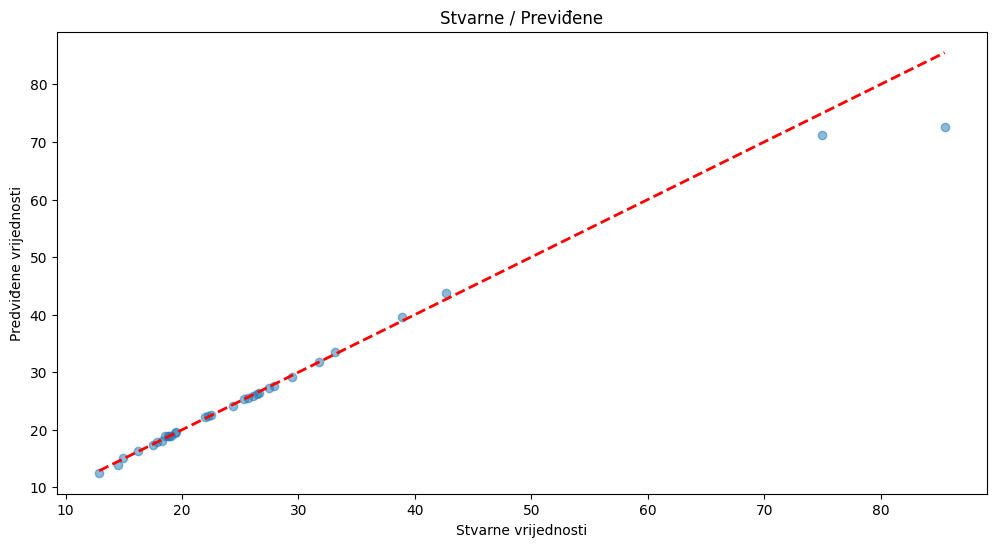

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Stvarne vrijednosti')
plt.ylabel('Predviđene vrijednosti')
plt.title('Stvarne / Previđene')
plt.show()


<Figure size 1000x700 with 0 Axes>

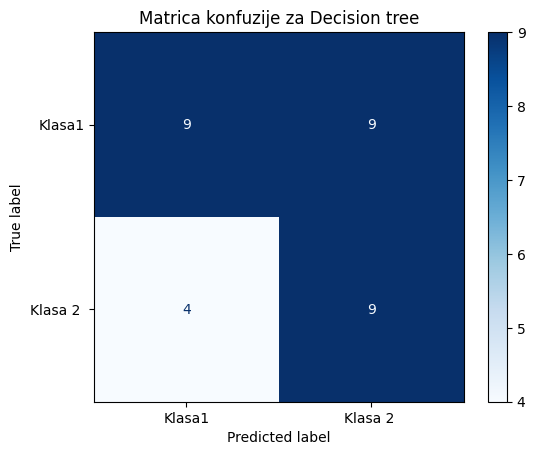

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tree_matrix = confusion_matrix(Y_test_class, tree_predictions)
plt.figure(figsize=(10,7))
disp=ConfusionMatrixDisplay(tree_matrix, display_labels=['Klasa1', 'Klasa 2 '])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrica konfuzije za Decision tree')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

forest_matrix=confusion_matrix(Y_test_class, forest_predictions)
plt.figure(figsize=(10,7))
disp=ConfusionMatrixDisplay(forest_matrix, display_labels=['k1', 'k2'])
displ.plot(cmap=plt.cm.Blues)
plt.title('Matrica')
plt.show()

NameError: name 'displ' is not defined

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

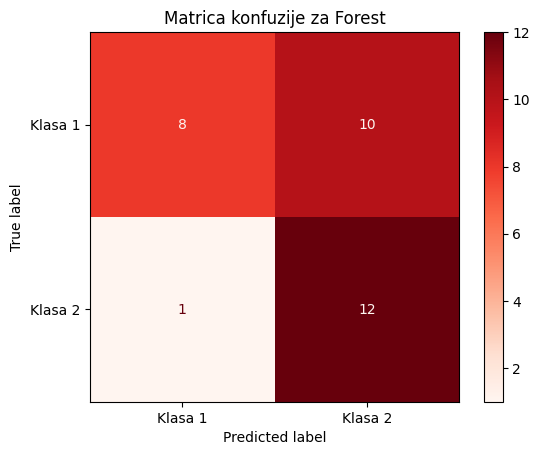

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

forest_matrix=confusion_matrix(Y_test_class, forest_predictions)
plt.figure(figsize=(10,7))
disp=ConfusionMatrixDisplay(forest_matrix, display_labels=['Klasa 1', 'Klasa 2'])
disp.plot(cmap=plt.cm.Reds)
plt.title('Matrica konfuzije za Forest')
plt.show()